# Facial Expression Recognition Using CNN

# Project Goal:
**The primary goal of DeepFER:** Facial Emotion Recognition Using Deep Learning is to develop an advanced and efficient system capable of accurately identifying and classifying human emotions from facial expressions in real-time. By leveraging state-of-the-art Convolutional Neural Networks (CNNs) and Transfer Learning techniques, this project aims to create a robust model that can handle the inherent variability in facial expressions and diverse image conditions. The system will be trained on a comprehensive dataset featuring seven distinct emotions: angry, sad, happy, fear, neutral, disgust, and surprise. The ultimate objective is to achieve high accuracy and reliability, making DeepFER suitable for applications in human-computer interaction, mental health monitoring, customer service, and beyond. Through this project, we aim to bridge the gap between cutting-edge AI research and practical emotion recognition applications, contributing to more empathetic and responsive machine interactions with humans.

Emotion Classes:
* Angry: Images depicting expressions of anger.
* Sad: Images depicting expressions of sadness.
* Happy: Images depicting expressions of happiness.
* Fear: Images depicting expressions of fear.
* Neutral: Images depicting neutral, non-expressive faces.
* Disgust: Images depicting expressions of disgust.
* Surprise: Images depicting expressions of surprise.

### **Import Libraries**

This section imports the essential libraries needed for constructing and training a convolutional neural network (CNN) for facial expression recognition.

- `os`: Provides functions to interact with the operating system, useful for handling file operations.
- `cv2`: OpenCV library for computer vision, used here for processing images.
- `numpy`: A library for numerical computing, essential for array manipulations.
- `tensorflow`: The TensorFlow library used for deep learning tasks.
- `train_test_split` from `sklearn.model_selection`: Splits the dataset into training and testing subsets.
- `ImageDataGenerator` from `tensorflow.keras.preprocessing.image`: Generates batches of augmented data for training.
- `LabelEncoder` from `sklearn.preprocessing`: Converts categorical labels into numerical format.
- `to_categorical` from `keras.utils`: Transforms class labels into a binary class matrix.
- `Sequential` from `keras.models`: A linear stack of layers used to build deep learning models.
- `Dense`, `Conv2D`, `Dropout`, `BatchNormalization`, `MaxPooling2D`, `Flatten` from `keras.layers`: Various layers used in the CNN architecture.
- Optimizers (`Adam`, `RMSprop`, `SGD`) from `keras.optimizers`: Algorithms that adjust model weights during training.
- `plt` from `matplotlib.pyplot`: A plotting library for visualizing training and validation curves.
- Callbacks (`ModelCheckpoint`, `EarlyStopping`, `ReduceLROnPlateau`) from `keras.callbacks`: Tools used during training to enhance model performance or handle interruptions.


In [1]:
%pip install opencv-python numpy tensorflow scikit-learn matplotlib seaborn gradio

     ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
     ---------------------------------------- 0.4/40.2 MB 7.6 MB/s eta 0:00:06
      --------------------------------------- 0.8/40.2 MB 8.3 MB/s eta 0:00:05
     - -------------------------------------- 1.1/40.2 MB 7.9 MB/s eta 0:00:05
     - -------------------------------------- 1.4/40.2 MB 7.7 MB/s eta 0:00:06
     - -------------------------------------- 1.8/40.2 MB 7.6 MB/s eta 0:00:06
     -- ------------------------------------- 2.1/40.2 MB 7.4 MB/s eta 0:00:06
     -- ------------------------------------- 2.4/40.2 MB 7.4 MB/s eta 0:00:06
     -- ------------------------------------- 2.8/40.2 MB 7.3 MB/s eta 0:00:06
     --- ------------------------------------ 3.1/40.2 MB 7.3 MB/s eta 0:00:06
     --- ------------------------------------ 3.4/40.2 MB 7.6 MB/s eta 0:00:05
     --- ------------------------------------ 3.6/40.2 MB 6.6 MB/s eta 0:00:06
     ---- ----------------------------------- 4.0/40.2 MB 6


[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import gradio as gr

c:\Users\sharath\Downloads\S_p\Sp_5\.venv_10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Defining the path and classes

In [3]:
# Define the base path to your dataset
BASE_PATH = r"Face Emotion Recognition Dataset"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
VALIDATION_PATH = os.path.join(BASE_PATH, "validation")

# Define emotion classes
EMOTION_CLASSES = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Image parameters
IMG_SIZE = 48  # Standard size for emotion recognition
CHANNELS = 1   # Grayscale images

In [4]:
# Load training dataset
# Initialize lists for training data
train_images = []
train_labels = []

print("="*50)
print("LOADING TRAINING DATA")
print("="*50)

for emotion_class in EMOTION_CLASSES:
    emotion_path = os.path.join(TRAIN_PATH, emotion_class)
    
    if not os.path.exists(emotion_path):
        print(f"Warning: Path {emotion_path} does not exist!")
        continue
        
    print(f"Loading {emotion_class} images...")
    emotion_images = os.listdir(emotion_path)
    
    # Loop through each image in the emotion folder
    for image_name in emotion_images:
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(emotion_path, image_name)
            
            # Load image in grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                # Resize image to target size
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                
                # Normalize pixel values to [0, 1]
                img = img.astype('float32') / 255.0
                
                # Add to lists
                train_images.append(img)
                train_labels.append(emotion_class)
    
    print(f"Loaded {len([l for l in train_labels if l == emotion_class])} {emotion_class} images")

LOADING TRAINING DATA
Loading angry images...
Loaded 3993 angry images
Loading disgust images...
Loaded 436 disgust images
Loading fear images...
Loaded 4103 fear images
Loading happy images...
Loaded 7164 happy images
Loading neutral images...
Loaded 4982 neutral images
Loading sad images...
Loaded 4938 sad images
Loading surprise images...
Loaded 3205 surprise images


In [5]:
# Convert to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)

print(f"\nTraining data loaded!")
print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")


Training data loaded!
Training images shape: (28821, 48, 48)
Training labels shape: (28821,)


In [6]:
# Initialize lists for validation data
val_images = []
val_labels = []

print("\n" + "="*50)
print("LOADING VALIDATION DATA")
print("="*50)

# Loop through each emotion class in validation data
for emotion_class in EMOTION_CLASSES:
    emotion_path = os.path.join(VALIDATION_PATH, emotion_class)
    
    if not os.path.exists(emotion_path):
        print(f"Warning: Path {emotion_path} does not exist!")
        continue
        
    print(f"Loading {emotion_class} images...")
    emotion_images = os.listdir(emotion_path)
    
    # Loop through each image in the emotion folder
    for image_name in emotion_images:
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(emotion_path, image_name)
            
            # Load image in grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                # Resize image to target size
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                
                # Normalize pixel values to [0, 1]
                img = img.astype('float32') / 255.0
                
                # Add to lists
                val_images.append(img)
                val_labels.append(emotion_class)
    
    print(f"Loaded {len([l for l in val_labels if l == emotion_class])} {emotion_class} images")

# Convert to numpy arrays
X_val = np.array(val_images)
y_val = np.array(val_labels)

print(f"\nValidation data loaded!")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation labels shape: {y_val.shape}")


LOADING VALIDATION DATA
Loading angry images...
Loaded 960 angry images
Loading disgust images...
Loaded 111 disgust images
Loading fear images...
Loaded 1018 fear images
Loading happy images...
Loaded 1825 happy images
Loading neutral images...
Loaded 1216 neutral images
Loading sad images...
Loaded 1139 sad images
Loading surprise images...
Loaded 797 surprise images

Validation data loaded!
Validation images shape: (7066, 48, 48)
Validation labels shape: (7066,)


In [7]:
# Reshape images to add channel dimension for CNN
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, CHANNELS)
X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, CHANNELS)

print("Images reshaped for CNN:")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Images reshaped for CNN:
Training data shape: (28821, 48, 48, 1)
Validation data shape: (7066, 48, 48, 1)


In [8]:
# Initialize and fit label encoder
label_encoder = LabelEncoder()
label_encoder.fit(EMOTION_CLASSES)

# Transform labels to numerical values
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train_encoded, num_classes=len(EMOTION_CLASSES))
y_val_categorical = to_categorical(y_val_encoded, num_classes=len(EMOTION_CLASSES))

print("Label encoding completed!")
print(f"Label encoder classes: {label_encoder.classes_}")
print(f"Training labels shape (categorical): {y_train_categorical.shape}")
print(f"Validation labels shape (categorical): {y_val_categorical.shape}")

Label encoding completed!
Label encoder classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Training labels shape (categorical): (28821, 7)
Validation labels shape (categorical): (7066, 7)


In [10]:
# Count class distribution
train_distribution = Counter(y_train)
val_distribution = Counter(y_val)

print("\nClass Distribution Analysis:")
print("-" * 30)
print("Training set:")
for emotion, count in train_distribution.items():
    print(f"  {emotion}: {count} images")

print("\nValidation set:")
for emotion, count in val_distribution.items():
    print(f"  {emotion}: {count} images")


Class Distribution Analysis:
------------------------------
Training set:
  angry: 3993 images
  disgust: 436 images
  fear: 4103 images
  happy: 7164 images
  neutral: 4982 images
  sad: 4938 images
  surprise: 3205 images

Validation set:
  angry: 960 images
  disgust: 111 images
  fear: 1018 images
  happy: 1825 images
  neutral: 1216 images
  sad: 1139 images
  surprise: 797 images


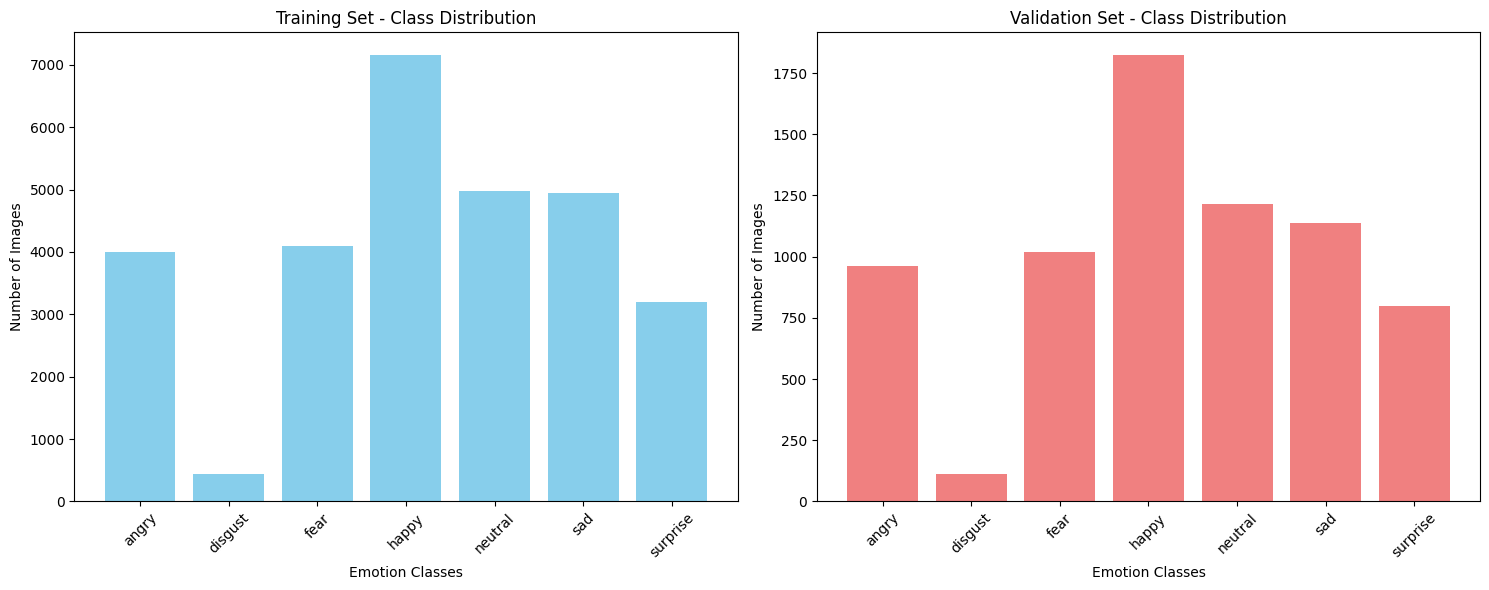

In [11]:
# Create bar plots for class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training distribution
axes[0].bar(train_distribution.keys(), train_distribution.values(), color='skyblue')
axes[0].set_title('Training Set - Class Distribution')
axes[0].set_xlabel('Emotion Classes')
axes[0].set_ylabel('Number of Images')
axes[0].tick_params(axis='x', rotation=45)

# Validation distribution
axes[1].bar(val_distribution.keys(), val_distribution.values(), color='lightcoral')
axes[1].set_title('Validation Set - Class Distribution')
axes[1].set_xlabel('Emotion Classes')
axes[1].set_ylabel('Number of Images')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

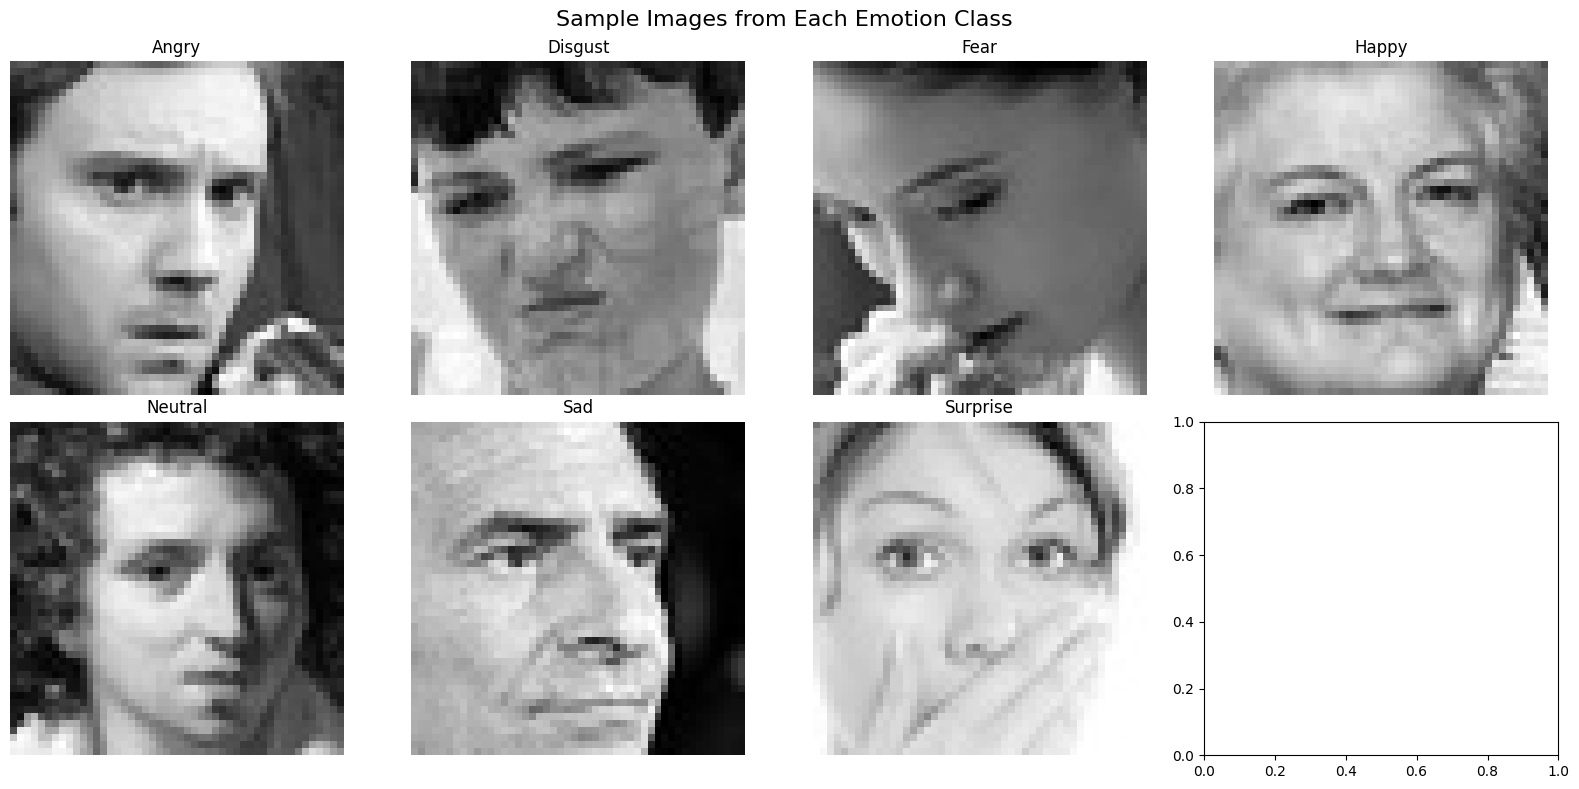

In [12]:
# Display sample images from each emotion class
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Get one sample from each class
samples_shown = set()
sample_count = 0

for i, (img, label) in enumerate(zip(X_train, y_train)):
    if label not in samples_shown and sample_count < 8:
        axes[sample_count].imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        axes[sample_count].set_title(f'{label.capitalize()}', fontsize=12)
        axes[sample_count].axis('off')
        samples_shown.add(label)
        sample_count += 1
        
    if sample_count >= 8:
        break

plt.suptitle('Sample Images from Each Emotion Class', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
print("\n" + "="*60)
print("DATASET LOADING SUMMARY")
print("="*60)
print(f"✓ Total training images: {len(X_train):,}")
print(f"✓ Total validation images: {len(X_val):,}")
print(f"✓ Image dimensions: {IMG_SIZE}x{IMG_SIZE} pixels")
print(f"✓ Color channels: {CHANNELS} (grayscale)")
print(f"✓ Number of emotion classes: {len(EMOTION_CLASSES)}")
print(f"✓ Emotion classes: {', '.join(EMOTION_CLASSES)}")
print(f"✓ Data type: {X_train.dtype}")
print(f"✓ Pixel value range: [{X_train.min():.1f}, {X_train.max():.1f}]")
print("="*60)
print("Dataset is ready for model training! 🚀")
print("\nYour data variables are:")
print("- X_train, y_train_categorical (for training)")
print("- X_val, y_val_categorical (for validation)")
print("- label_encoder (for converting predictions back to emotion names)")


DATASET LOADING SUMMARY
✓ Total training images: 28,821
✓ Total validation images: 7,066
✓ Image dimensions: 48x48 pixels
✓ Color channels: 1 (grayscale)
✓ Number of emotion classes: 7
✓ Emotion classes: angry, disgust, fear, happy, neutral, sad, surprise
✓ Data type: float32
✓ Pixel value range: [0.0, 1.0]
Dataset is ready for model training! 🚀

Your data variables are:
- X_train, y_train_categorical (for training)
- X_val, y_val_categorical (for validation)
- label_encoder (for converting predictions back to emotion names)


In [14]:
# Create ImageDataGenerator for data augmentation
data_gen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compute necessary statistics for data augmentation
data_gen.fit(X_train)

The `build_model` function defines the architecture of the convolutional neural network (CNN) designed for facial expression recognition.

- **1st Layer**: Convolutional layer with 64 filters of size (5, 5), ReLU activation, and batch normalization. This layer is followed by MaxPooling and Dropout layers for regularization.

- **2nd Layer**: Convolutional layer with 128 filters of size (3, 3), ReLU activation, and batch normalization, with MaxPooling and Dropout layers added for regularization.

- **3rd Layer**: Convolutional layer with 512 filters of size (3, 3), ReLU activation, and batch normalization, accompanied by MaxPooling and Dropout layers for regularization.

- **4th Layer**: Convolutional layer with 512 filters of size (3, 3), ReLU activation, and batch normalization, followed by MaxPooling and Dropout layers for regularization.

- **Flatten Layer**: Flattens the output from the convolutional layers to prepare it for the fully connected layers.

- **Fully Connected Layer 1**: Dense layer with 256 units and ReLU activation, including batch normalization and dropout for regularization.

- **Fully Connected Layer 2**: Dense layer with 512 units and ReLU activation, with batch normalization and dropout applied for regularization.

- **Output Layer**: Dense layer with softmax activation for multi-class classification, where the number of units corresponds to the number of classes in the dataset.

- **Compilation**: The model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.


In [15]:
# Building Model
def build_model():
    model = Sequential()
    # 1st Layer
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 2nd Layer
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 3rd layer
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # 4th layer
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # Flatten Layer
    model.add(Flatten())

    # Fully connected layer 1
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Fully connected layer 2
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(len(EMOTION_CLASSES), activation='softmax'))

    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

The `summary()` method is invoked on the constructed model to provide an overview of its architecture. This summary includes details on the layers, their output shapes, and the number of trainable parameters.


In [16]:
# Build the model
model = build_model()

# Print model summary
print(model.summary())

c:\Users\sharath\Downloads\S_p\Sp_5\.venv_10\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 4,348,679 (16.59 MB)

 Trainable params: 4,344,711 (16.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


The `ModelCheckpoint` callback is set up to save the model weights during training. It tracks the validation accuracy (`val_acc`) and saves only the best model, as determined by the highest validation accuracy, to the specified file `"model.h5"`.


In [17]:
# Initialize ModelCheckpoint callback
checkpoint = ModelCheckpoint("model.keras", monitor="val_acc", verbose=1, save_best_only=True)

The `EarlyStopping` callback is configured to monitor the validation loss (`val_loss`). It halts the training process if the validation loss does not improve for a specified number of epochs (`patience`). This early stopping helps prevent overfitting, and the weights of the best-performing model are restored (`restore_best_weights=True`).


In [18]:
# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

The `ReduceLROnPlateau` callback is configured to adjust the learning rate dynamically during training based on the validation loss (`val_loss`). If the validation loss does not show improvement for a defined number of epochs (`patience`), the learning rate is reduced by a specified factor (`factor`). This adjustment helps enhance the training process and prevents the model from getting stuck in local minima.


In [19]:
# Initialize ReduceLROnPlateau callback
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

The `callbacks_list` is a list that includes the callbacks to be applied during model training. It consists of the `EarlyStopping`, `ModelCheckpoint`, and `ReduceLROnPlateau` callbacks. These callbacks are used to monitor the validation loss, save the best model, and adjust the learning rate, respectively.


In [20]:
# List of callbacks
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

The `compile()` method is invoked on the model to set up the training process. It defines the loss function, optimizer, and evaluation metrics to be used during training.

- **Loss Function**: Categorical cross-entropy is selected for handling multi-class classification tasks.
- **Optimizer**: The Adam optimizer is used with a learning rate of 0.001.
- **Metrics**: Accuracy is chosen as the evaluation metric to track the model's performance throughout training.


In [21]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

The `fit()` method is called on the model to train it using the training data. It accepts the following parameters:

- `data_gen.flow(X_train, y_train_categorical, batch_size=128)`: A data generator that produces batches of augmented training data, with on-the-fly data augmentation provided by the `ImageDataGenerator` object defined earlier.
- `validation_data=(X_val, y_val_categorical)`: Validation data used to assess the model's performance after each epoch.
- `epochs=20`: The total number of epochs for training the model.
- `verbose=1`: Determines the verbosity level, with `1` enabling progress bars during training.


In [21]:
# Training the model
history = model.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=128),
    validation_data=(X_val, y_val_categorical),
    epochs=20,
    verbose=1
)

c:\Users\hritik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 156s 653ms/step - accuracy: 0.2206 - loss: 2.1230 - val_accuracy: 0.1424 - val_loss: 2.1052
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 652ms/step - accuracy: 0.3048 - loss: 1.7901 - val_accuracy: 0.2604 - val_loss: 3.0412
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 656ms/step - accuracy: 0.3767 - loss: 1.6104 - val_accuracy: 0.3334 - val_loss: 1.9122
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 654ms/step - accuracy: 0.4293 - loss: 1.4763 - val_accuracy: 0.3333 - val_loss: 2.6949
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 138s 609ms/step - accuracy: 0.4633 - loss: 1.3923 - val_accuracy: 0.4471 - val_loss: 1.5231
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 655ms/step - accuracy: 0.4851 - loss: 1.3341 - val_accuracy: 0.4359 - val_loss: 1.7939
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 204s 664ms/step - accuracy: 0.5051 - loss: 1.2877 - val_accuracy: 0.5072 - val_loss: 1.2739
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 154s 679ms/step - accuracy: 0.5171 -

The trained model is saved to a file named `'Custom_CNN_model.h5'` using the `save()` method. This file includes the model's architecture, weights, and training configuration, enabling you to reload the model later for inference or additional training.

In [22]:
# Save the model with .keras extension
model.save("Custom_CNN_model.keras")

In [23]:
# Saving the model with .h5 extension
model.save('Custom_CNN_model.h5')

The code snippet plots the model's accuracy over epochs for both training and validation. This visualization helps track the model's performance over time and assists in identifying issues such as overfitting or underfitting.

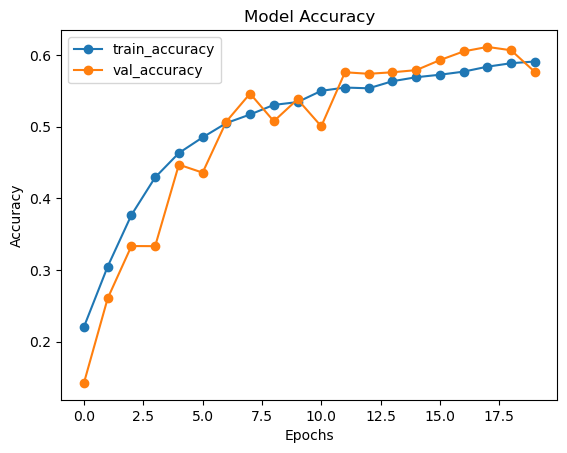

In [24]:
# Plotting model performance
plt.plot(history.history['accuracy'], label='train_accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='val_accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gradio Deployment

In [22]:
# Load your pre-trained model
model = tf.keras.models.load_model(r'C:\Users\sharath\Downloads\S_p\Sp_5\Custom_CNN_model.keras')

In [23]:
# Emotion labels dictionary
emotion_labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'neutral': 3, 'sad': 4, 'happy': 5, 'surprise': 6}
index_to_emotion = {v: k for k, v in emotion_labels.items()}
index_to_emotion

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'neutral',
 4: 'sad',
 5: 'happy',
 6: 'surprise'}

In [24]:
def prepare_image(img_pil):
    """Preprocess the PIL image to fit your model's input requirements."""
    # Resize the image to 48x48 pixels
    img = img_pil.resize((48, 48))

    # If the model expects grayscale images, convert the image to grayscale
    img = img.convert('L')

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Add a batch dimension (i.e., convert the image to a 4D tensor)
    img_array = np.expand_dims(img_array, axis=0)

    # Rescale pixel values to [0, 1] (normalize the data)
    img_array /= 255.0

    return img_array

In [25]:
# Define the Gradio interface
def predict_emotion(image):
    # Preprocess the image
    processed_image = prepare_image(image)
    # Make prediction using the model
    prediction = model.predict(processed_image)
    # Get the emotion label with the highest probability
    predicted_class = np.argmax(prediction, axis=1)
    predicted_emotion = index_to_emotion.get(predicted_class[0], "Unknown Emotion")
    return predicted_emotion

In [26]:
interface = gr.Interface(
    fn=predict_emotion,  # Your prediction function
    inputs=gr.Image(type="pil"),  # Input for uploading an image, directly compatible with PIL images
    outputs="text",  # Output as text displaying the predicted emotion
    title="Emotion Detection",
    description="Upload an image and see the predicted emotion."
)

# Launch the Gradio interface
interface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
